In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import requests
import tweepy

import json
import seaborn as sns



In [73]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [74]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [75]:
#Scrape the image predictions file from the url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open("image-predictions.tsv", mode = 'wb') as file:
    file.write(response.content)
image_prediction = pd.read_csv("image-predictions.tsv", sep = '\t')

In [76]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [93]:
#Setting up the twitter API with authentication pieces
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'OAuthHandler' is not defined

In [77]:
#Creating new dataframe with id, retweet_count and favourite_count
tweet_json = open('tweet_json.txt', 'r')
df_tweet = pd.DataFrame(columns=['tweet_id', 'retweets', 'favorites'])

for line in tweet_json:
    tweet = json.loads(line)
    df_tweet = df_tweet.append({'tweet_id': tweet['id'], 'retweets': tweet['retweet_count'], 'favorites': tweet['favorite_count']}, ignore_index=True)
tweet_json.close()



In [78]:
#Assessing Data
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
589,799308762079035393,NaN,NaN,2016-11-17 17:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I WAS SENT THE ACTUAL DOG IN TH...,7.743144e+17,4.196984e+09,2016-09-09 18:31:54 +0000,https://twitter.com/dog_rates/status/774314403...,14,10,None,None,None,None,None
2070,671122204919246848,NaN,NaN,2015-11-30 00:22:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two miniature golden retrievers here. Webbed p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671122204...,4,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
331,832998151111966721,NaN,NaN,2017-02-18 17:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rhino. He arrived at a shelter with an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832998151...,13,10,Rhino,doggo,None,None,None
2031,671768281401958400,NaN,NaN,2015-12-01 19:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you try to recreate the scene from Lady &...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671768281...,10,10,None,None,None,None,None
612,796904159865868288,NaN,NaN,2016-11-11 02:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Tyrone. He's a leaf wiz...,6.873173e+17,4.196984e+09,2016-01-13 16:56:30 +0000,https://twitter.com/dog_rates/status/687317306...,11,10,Tyrone,None,None,None,None
65,879492040517615616,NaN,NaN,2017-06-27 00:10:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. He thinks you should measure e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879492040...,12,10,Bailey,None,None,None,None
1515,690989312272396288,NaN,NaN,2016-01-23 20:07:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We've got a doggy down. Requesting backup. 12/...,NaN,NaN,NaN,https://vine.co/v/iOZKZEU2nHq,12,10,None,None,None,None,None
1132,728760639972315136,NaN,NaN,2016-05-07 01:37:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When you're way too slow for the ""down low"" po...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/728760639...,13,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None


In [79]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [80]:
sum(twitter_archive.tweet_id.duplicated())

0

In [81]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [82]:
sum(twitter_archive.text.duplicated())

0

In [83]:
twitter_archive.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [84]:
twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [85]:
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [86]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [87]:
twitter_archive.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [88]:
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
485,675489971617296384,https://pbs.twimg.com/media/CV_SimUWoAAvJSY.jpg,1,West_Highland_white_terrier,0.139613,True,seat_belt,0.118647,False,Old_English_sheepdog,0.093952,True
1000,708711088997666817,https://pbs.twimg.com/media/CdXY-GHWoAALing.jpg,2,tennis_ball,0.912961,False,German_short-haired_pointer,0.052695,True,Labrador_retriever,0.018477,True
337,672231046314901505,https://pbs.twimg.com/media/CVQ-kfWWoAAXV15.jpg,1,killer_whale,0.823919,False,grey_whale,0.036601,False,hammerhead,0.029522,False
1647,808733504066486276,https://pbs.twimg.com/media/Czky0v9VIAEXRkd.jpg,1,seat_belt,0.779137,False,toy_poodle,0.036927,True,golden_retriever,0.016972,True
399,673686845050527744,https://pbs.twimg.com/media/CVlqi_AXIAASlcD.jpg,1,Pekinese,0.185903,True,guinea_pig,0.172951,False,pug,0.166183,True
920,701952816642965504,https://pbs.twimg.com/media/Cb3WXMUUMAIuzL8.jpg,1,toy_poodle,0.331707,True,miniature_poodle,0.272485,True,standard_poodle,0.169415,True
1246,747594051852075008,https://pbs.twimg.com/media/Cl_80k5WkAEbo9m.jpg,1,basenji,0.389136,True,dingo,0.270226,False,Chihuahua,0.098939,True
1945,862096992088072192,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,2,chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,0.038110,True
518,676470639084101634,https://pbs.twimg.com/media/CWNOdIpWoAAWid2.jpg,1,golden_retriever,0.790386,True,borzoi,0.022885,True,dingo,0.015343,False
1322,756526248105566208,https://pbs.twimg.com/media/Cn-4m2CXYAErPGe.jpg,1,geyser,0.991273,False,volcano,0.004673,False,fountain,0.001234,False


In [89]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [90]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [91]:
image_prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [92]:
image_prediction.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [93]:
image_prediction.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [94]:
df_tweet.sample(20)

,tweet_id,retweets,favorites
778,775842724423557120,3116,13022
1589,686606069955735556,607,2071
1142,727286334147182592,920,3324
1329,705591895322394625,1308,3475
281,839239871831150596,7422,29684
1435,697242256848379904,751,2753
389,826240494070030336,2965,14614
1828,676219687039057920,31989,67100
1336,705066031337840642,683,2378
1189,717841801130979328,670,2660


In [95]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
retweets     2354 non-null object
favorites    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [96]:
twitter_archive_re = twitter_archive.copy()
image_prediction_re = image_prediction.copy()
df_tweet_re = df_tweet.copy()

Quality and Tidiness issues:


Quality Issues:
1) Timestamp should be datetime instead of object.
2) Removing columns which are of no use.
3) Only original tweets are required, retweets are to be removed.
4) Removing rows with column_rating other than 10.
5) Replacing irrelevant names starting with lowercase.
6) Relacing None in the names column with nan.
7) Combining doggo, floofer, pupper and puppo columns into a single column.
8) All the columns in df_tweet should be integers.

In [97]:
twitter_archive_re.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
20,888078434458587136,NaN,NaN,2017-07-20 16:49:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He was just told he didn't get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888078434...,12,10,Gerald,None,None,None,None
1106,734787690684657664,NaN,NaN,2016-05-23 16:46:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is more successful than I will ever b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734787690...,13,10,None,None,None,None,None
356,830583320585068544,NaN,NaN,2017-02-12 01:04:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilly. She just parallel barked. Kindl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
1949,673689733134946305,NaN,NaN,2015-12-07 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a blast and remember tomorr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673689733...,11,10,None,None,None,None,None
1628,684588130326986752,NaN,NaN,2016-01-06 04:11:43 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper just got his first kiss. 12/10 he'...,NaN,NaN,NaN,https://vine.co/v/ihWIxntjtO7,12,10,None,None,None,pupper,None


Code:

In [98]:
#Timestamp should be datetime instead of object
twitter_archive_re['timestamp'] = pd.to_datetime(twitter_archive_re['timestamp'])

Test:

In [99]:
twitter_archive_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

Code:

In [100]:
#Remove unwanted columns
twitter_archive_re = twitter_archive_re.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_user_id", "retweeted_status_timestamp", "text"],axis = 1)
twitter_archive_re

,tweet_id,timestamp,source,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Test:

In [101]:
twitter_archive_re

,tweet_id,timestamp,source,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Code:

In [102]:
#Only original tweets required so retweets with retweeted_status_id NaN will only be kept
twitter_archive_re = twitter_archive_re[np.isnan(twitter_archive_re.retweeted_status_id)]


Test:

In [103]:
twitter_archive_re

,tweet_id,timestamp,source,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Code:

In [104]:
#Delete columns with denominator other than 10 because rating has to be done out of 10
df_twitter_archive = twitter_archive_re.query('rating_denominator == 10')
df_twitter_archive.head()

,tweet_id,timestamp,source,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Test:

In [105]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id               2153 non-null int64
timestamp              2153 non-null datetime64[ns]
source                 2153 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          2099 non-null object
rating_numerator       2153 non-null int64
rating_denominator     2153 non-null int64
name                   2153 non-null object
doggo                  2153 non-null object
floofer                2153 non-null object
pupper                 2153 non-null object
puppo                  2153 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 218.7+ KB


Code:

In [106]:
#Name section is inaccurate since many names start with lowercase
#Finding the names starting with lowercase
lower_name = []
for name in df_twitter_archive["name"]:
    if name[0].islower() and name not in lower_name:
        lower_name.append(name)
print(lower_name)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [107]:
#Replacing all the names in lower_name with NaN
df_twitter_archive["name"].replace(lower_name, np.nan, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Test:

In [108]:
df_twitter_archive.name.value_counts()

None         664
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Winston        8
Lola           8
Sadie          8
Daisy          7
Toby           7
Oscar          6
Stanley        6
Bailey         6
Koda           6
Jax            6
Bo             6
Bella          6
Dave           5
Chester        5
Milo           5
Buddy          5
Bentley        5
Leo            5
Rusty          5
Scout          5
Louis          5
Clarence       4
George         4
            ... 
Rose           1
Emanuel        1
Hubertson      1
Skye           1
Goose          1
Franq          1
Harper         1
Shawwn         1
Odin           1
Bonaparte      1
Mo             1
Glenn          1
Cupid          1
Maude          1
Ed             1
Josep          1
Wishes         1
Halo           1
Eriq           1
William        1
Tonks          1
Bertson        1
Major          1
Maks           1
DonDon         1
Hall           1
Dug            1
Strider       

Code:

In [109]:
#Replacing names having none with Nan
df_twitter_archive["name"].replace('None', np.nan, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Test:

In [110]:
df_twitter_archive.name.value_counts()

Lucy         11
Charlie      11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Lola          8
Sadie         8
Winston       8
Daisy         7
Toby          7
Stanley       6
Koda          6
Bailey        6
Bo            6
Bella         6
Jax           6
Oscar         6
Rusty         5
Dave          5
Milo          5
Buddy         5
Leo           5
Bentley       5
Scout         5
Chester       5
Louis         5
Sammy         4
Sophie        4
Gary          4
             ..
Jaycob        1
Rose          1
Emanuel       1
Hubertson     1
Alf           1
Shawwn        1
Pilot         1
Arlen         1
Harper        1
Odin          1
Bonaparte     1
Mo            1
Glenn         1
Cupid         1
Maude         1
Ed            1
Josep         1
Wishes        1
Halo          1
Eriq          1
William       1
Tonks         1
Bertson       1
Major         1
Maks          1
DonDon        1
Hall          1
Dug           1
Strider       1
Kenzie        1
Name: name, Length: 928,

Code:

In [111]:
#Combining the doggo, floofer, pupper puppo columns into single column
df_twitter_archive = pd.melt(df_twitter_archive, id_vars = ['tweet_id', 'timestamp', 'source', 'retweeted_status_id', 'expanded_urls', "rating_numerator", "rating_denominator", "name" ], var_name = 'dog', value_name= 'dog_stage')

In [112]:
df_twitter_archive.sample(10)

,tweet_id,timestamp,source,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,dog,dog_stage
5441,706153300320784384,2016-03-05 16:24:01,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,https://vine.co/v/iXidJXBJ3P9,13,10,Layla,pupper,None
7126,768609597686943744,2016-08-25 00:43:02,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/768609597...,10,10,Lou,puppo,None
8349,670786190031921152,2015-11-29 02:07:44,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/670786190...,8,10,Creg,puppo,None
4822,793165685325201412,2016-10-31 19:00:10,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/793165685...,12,10,Benji,pupper,None
3808,675531475945709568,2015-12-12 04:23:49,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/675531475...,10,10,Ellie,floofer,None
116,867051520902168576,2017-05-23 16:16:06,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/867051520...,13,10,NaN,doggo,None
862,743595368194129920,2016-06-17 00:05:25,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/743595368...,7,10,Harold,doggo,None
3495,689977555533848577,2016-01-21 01:07:23,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/689977555...,12,10,NaN,floofer,None
3610,683462770029932544,2016-01-03 01:39:57,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/683462770...,8,10,NaN,floofer,None
7188,758405701903519748,2016-07-27 20:56:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/758405701...,10,10,Odie,puppo,None


In [113]:
df_twitter_archive = df_twitter_archive.drop("dog", 1)


Test:

In [114]:
df_twitter_archive.sample(20)

,tweet_id,timestamp,source,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1401,686377065986265092,2016-01-11 02:40:19,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/686377065...,10,10,Birf,None
6062,673612854080196609,2015-12-06 21:19:54,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/673612854...,7,10,Jeffri,pupper
5944,676089483918516224,2015-12-13 17:21:08,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/676089483...,9,10,NaN,None
5338,714631576617938945,2016-03-29 01:53:39,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/714631576...,4,10,Benedict,None
6784,826598365270007810,2017-02-01 01:09:42,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/826598365...,13,10,Pawnd,None
55,880935762899988482,2017-06-30 23:47:07,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/880935762...,13,10,Louis,None
4537,841320156043304961,2017-03-13 16:08:50,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/abc/status/841311395547250688,12,10,NaN,None
3536,687460506001633280,2016-01-14 02:25:31,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/687460506...,10,10,Kramer,None
2155,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
7501,713411074226274305,2016-03-25 17:03:49,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/713411074...,11,10,NaN,None


In [115]:
df_twitter_archive.dog_stage.value_counts()

None       8256
pupper      234
doggo        87
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [116]:
# All the columns in df_tweet should be integers
df_tweet_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
retweets     2354 non-null object
favorites    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


Code:

In [117]:
df_tweet_re['tweet_id'] = df_tweet_re.tweet_id.astype(int)
df_tweet_re['retweets'] = df_tweet_re.retweets.astype(int)
df_tweet_re['favorites'] = df_tweet_re.favorites.astype(int)

Test:

In [118]:
df_tweet_re.dtypes

tweet_id     int64
retweets     int64
favorites    int64
dtype: object

Tidiness issues:
1) Merging all the columns on tweet_id
2) Combining numerator and denominator column into a single column

Code:

In [119]:
#Merging all the columns on tweet_id
df_comb = pd.merge(df_twitter_archive, df_tweet_re, on = 'tweet_id', how = 'inner')
df_comb.head()

,tweet_id,timestamp,source,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,favorites
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467
1,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467
2,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467
3,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467
4,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819


Test:

In [120]:
df_combined = pd.merge(df_comb, image_prediction_re, on = 'tweet_id', how = 'inner') 
df_combined.head()

,tweet_id,timestamp,source,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
3,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
4,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [121]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7904 entries, 0 to 7903
Data columns (total 22 columns):
tweet_id               7904 non-null int64
timestamp              7904 non-null datetime64[ns]
source                 7904 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          7904 non-null object
rating_numerator       7904 non-null int64
rating_denominator     7904 non-null int64
name                   5388 non-null object
dog_stage              7904 non-null object
retweets               7904 non-null int64
favorites              7904 non-null int64
jpg_url                7904 non-null object
img_num                7904 non-null int64
p1                     7904 non-null object
p1_conf                7904 non-null float64
p1_dog                 7904 non-null bool
p2                     7904 non-null object
p2_conf                7904 non-null float64
p2_dog                 7904 non-null bool
p3                     7904 non-null object
p3_conf        

In [122]:
df_combined = df_combined.drop_duplicates()

In [123]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 7900
Data columns (total 22 columns):
tweet_id               2293 non-null int64
timestamp              2293 non-null datetime64[ns]
source                 2293 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          2293 non-null object
rating_numerator       2293 non-null int64
rating_denominator     2293 non-null int64
name                   1528 non-null object
dog_stage              2293 non-null object
retweets               2293 non-null int64
favorites              2293 non-null int64
jpg_url                2293 non-null object
img_num                2293 non-null int64
p1                     2293 non-null object
p1_conf                2293 non-null float64
p1_dog                 2293 non-null bool
p2                     2293 non-null object
p2_conf                2293 non-null float64
p2_dog                 2293 non-null bool
p3                     2293 non-null object
p3_conf        

Code:

In [125]:
#Combining rating_numerator and rating_denominator into a single column
df_combined["rating"] = df_combined["rating_numerator"]/df_combined["rating_denominator"]
df_combined.head()

,tweet_id,timestamp,source,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweets,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
4,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3
8,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
12,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
16,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2


Test:

In [126]:
df_combined = df_combined.drop(columns = ["rating_numerator", "rating_denominator"])
df_combined.head()

,tweet_id,timestamp,source,retweeted_status_id,expanded_urls,name,dog_stage,retweets,favorites,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
4,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3
8,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891815181...,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
12,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891689557...,Darla,None,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
16,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2


In [127]:
df_combined.to_csv("twitter_archive_master.csv")

#Insights and visualization

Text(0,0.5,'Favourite Count')

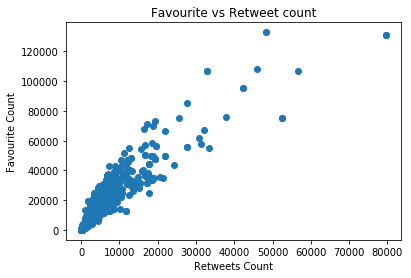

In [128]:
#Plotting graph between favourites and retweet count
plt.scatter(x = 'retweets', y = 'favorites', data = df_combined)
plt.title("Favourite vs Retweet count")
plt.xlabel("Retweets Count")
plt.ylabel("Favourite Count")

In [130]:
#Favourites for each dog_stage
df_combined.groupby(["dog_stage"])["rating"].mean()

dog_stage
None       1.169838
doggo      1.178378
floofer    1.187500
pupper     1.072642
puppo      1.204348
Name: rating, dtype: float64

In [132]:
df_combined.groupby(["dog_stage"])["favorites"].mean()

dog_stage
None        8921.050607
doggo      18881.932432
floofer    13701.375000
pupper      7424.240566
puppo      22723.913043
Name: favorites, dtype: float64

In [133]:
df_combined.groupby(["dog_stage"])["retweets"].mean()

dog_stage
None       2769.273785
doggo      6868.905405
floofer    4776.750000
pupper     2436.594340
puppo      7027.086957
Name: retweets, dtype: float64

In [134]:
df = df_combined.groupby(["dog_stage"])["rating"]